# Objective of the project: This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection. The goal is to classify whether the breast cancer is benign or malignant. To achieve this i have used machine learning classification methods to fit a function that can predict the discrete class of new input

**First, import the pyhton libraries pandas for data manipulation and analysis,numpy for scientific computation which contains n-dimensional array object and the last one is matplotlib.pyplot plotting library for 2D graphics in python.**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Read the data file by pandas library (pd.read_csv) function**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv")

**to look out the data df.head() which shows the first 5 rows of the data**

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**df.shape = which shows how many rows and columns are present in the data**

In [4]:
df.shape

(569, 33)

**df.columns= to look out the names of the all columns of the data**

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**df.isna().sum() is used to check the NA values in the dataset and produce the sum of the NA values. Unnmaed Column contains 569 NA values.**

In [6]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**the 2 columns in the data [Unnamed:32]=which contains all the missing values and the 2nd column Id which is have no use in analysis. So we removed both columns from the data by df.drop() function**

In [7]:
df.drop('id', axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

**Now the data has 569 rows and 31 columns.**

In [8]:
df.shape

(569, 31)

**df.corr() is used to find the correlation among all the columns to check that which columns are how much correlated with each other.**

In [9]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


***Import the seaborn library which is a statistical data visualization library provides high-level interface. ***

In [10]:
import seaborn as  sns
sns.set(rc={'figure.figsize':(21.7,10.27)})

**plot the heatmap of the correlation of the data by sns.heatmap() and annot=True refers annotate each cell with the numeric value using integer formatting. light color squares shows that the columns are highly correlated.**
**for eaxmple:- (radius_mean and area_mean have 0.99 correlation value which shows both the columns are highly correlated. there are other columns also which are highly correlated as seen in the heatmap**

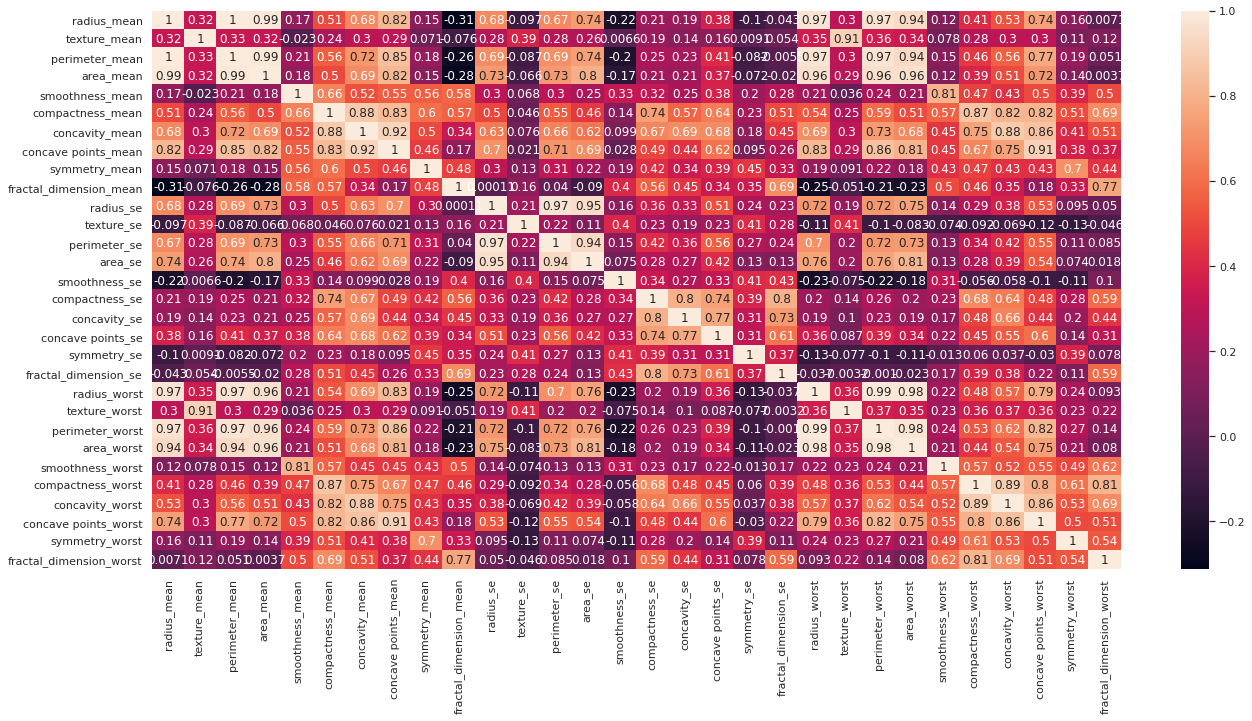

In [11]:
sns.heatmap(df.corr(),annot=True)


# Data Visualization:to find the data distribution of the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17b419a630>,
      dtype=object)

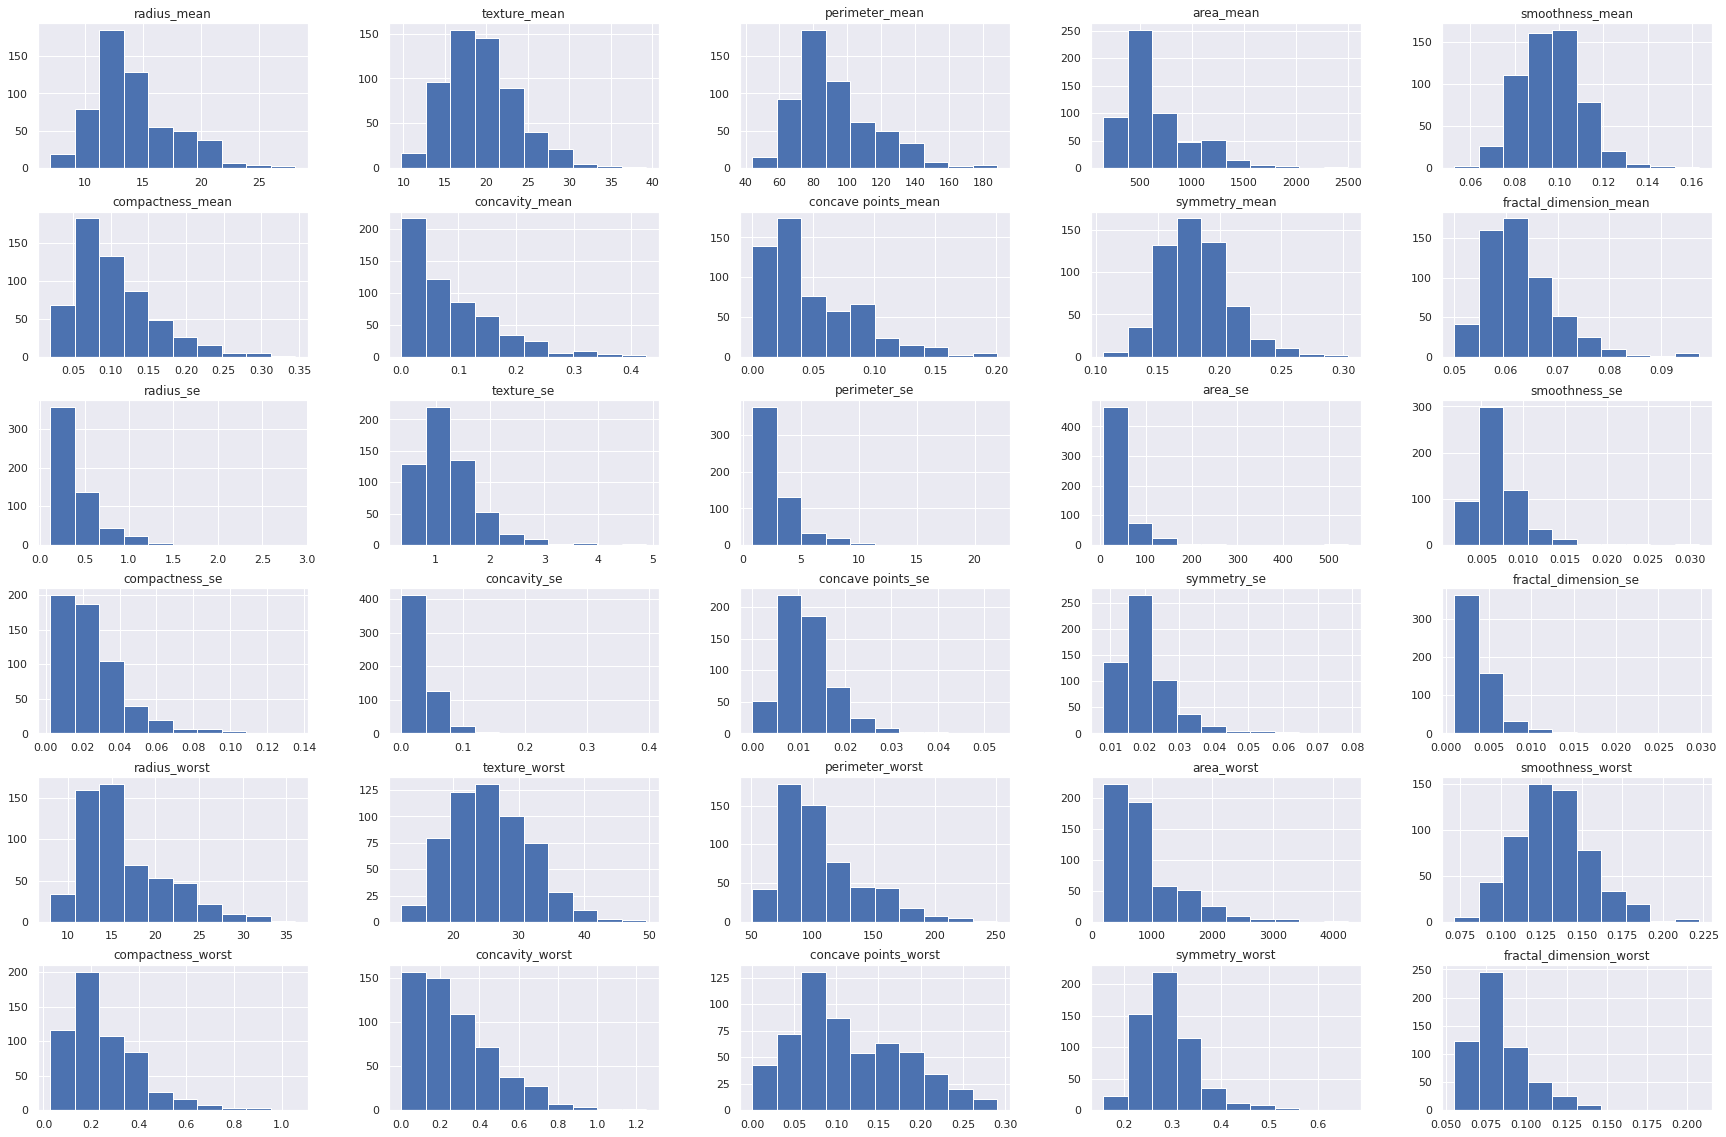

In [12]:
plt.rcParams['figure.figsize']=(30,20)
df.hist()

**import the LabelEncoder from sklear.preprocessing to encode the data. machine learning in python only process the numerical data and the target variable (dignosis) contains the categorical data (M=Malignant and B=Benign). To convert it into numerical data we use LabelEncoder in preprocessing of the data.**

In [13]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df['diagnosis'] = la.fit_transform(df.diagnosis)

**After encoding the labels are changed M=1 and B=0.** # to check this we use inverse_transform function.

In [14]:
la.inverse_transform([0,1])

array(['B', 'M'], dtype=object)

In [15]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**drop the target variable(dignosis) and set the rest of the columns in the X variable and target variable(dignosis) set in the y variable.**

In [16]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

**Import the train_test_split to divide the data in the training dataset and testing_dataset in the ratio of 0.70 and 0.30. training data is used to train the model and test data is used to check the performence of the model.**

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train[[ 'radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']])
X_test = sc.fit_transform(X_test[[ 'radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']])


**Import the Knn Classifier stands for KNeighborsClassifier. It is a supervised machine learning algorithm which performs classification task.  It calculates Euclidean distance of a new data point to all other training data points. and then selects the K-nearest data points. here the value of the n_neighbors is 5.
A data point is labeled with by majority from the 5 nearest points.** 

  **To train the model we use train_test_split and then we use knn.fit() function to fit the model on the traininf dataset.**

  **After training the model to make the prediction on the data we use Knn.predict() function . As seen when inspecting ‘y’ , 1 indicates that the cancer is Malignant and 0 indicates that the cancer  is Benign.** 



In [34]:
# fit the model

# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Import accracy_score to check the accuracy of the model.**

In [35]:
from sklearn.metrics import accuracy_score


**To check the accuracy of the model we use accuracy_score function() and pass the argument test input and target data to check how well our model predictions match up to the actual results.**
  **Our Model has the 94.73% accuracy which means if we give the new data to that model it gives the result with the 94.73% accuracy rate.**

In [36]:
accuracy_score(y_test,Y_pred)*100


94.73684210526315

**Import the cross_validation which is used to split the dataset in k groups randomly.**

In [37]:
# cross validation
from sklearn.model_selection import cross_val_score

**It splits the dataset into train test. One group is used as test dataset and the rest group are used as train dataset. The model is trained on the train dataset and scored on the test set. the process repeats untill all the groups are used as test dataset.**

  **here we have take the cross validation value=10. and predict the cross_validation_score on the each group.**

In [39]:
score = cross_val_score(model,X,y,cv=10)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


**After checking the score here are 10 array results. CV=10 produces 10 results which was performed on the 10 unique groups of the dataset.**

In [40]:
score

array([0.92982456, 0.9122807 , 0.92982456, 0.92982456, 0.98245614,
       0.96491228, 0.92982456, 0.94736842, 0.96491228, 0.96428571])

**Now take the mean of the all 10 score to check the accuracy of the model.
Our Model has the 92% accuracy which means if we give the new data to that model it gives the result with the 92% accuracy rate.**

In [41]:
score.mean()

0.9455513784461151

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
con = confusion_matrix(y_test,Y_pred)

In [44]:
con

array([[105,   3],
       [  6,  57]])

In [45]:
classification_report(y_test,Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96       108\n           1       0.95      0.90      0.93        63\n\n    accuracy                           0.95       171\n   macro avg       0.95      0.94      0.94       171\nweighted avg       0.95      0.95      0.95       171\n'

## Stratified K-fold

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [46]:
accuracy=[]

skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
  print("Train:", train_index, "Validation:", test_index)

  X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
  y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

  knn.fit(X1_train,y1_train)
  y_pred= knn.predict(X1_test)
  score=accuracy_score(y_pred, y1_test)
  accuracy.append(score)
print(accuracy)

Train: [ 25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42  43
  44  45  47  53  54  56  57  62  64  65  70  72  73  75  77  78  82  83
  85  86  87  91  94  95  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 300 301

In [47]:
import numpy as np
np.mean(accuracy)

0.9297619047619046

# That is it, you are done creating your breast detection program to predict if a patient has cancer  is Maligent or benign.